In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

#plt.style.use(['science', 'notebook'])
#%matplotlib inline


In [162]:
data_file = "conso.txt"

In [163]:
def read_text(filename):
    f = open(filename, "r")
    text = f.readlines()
    f.close()
    print(text)

#read_text(data_file)

In [164]:
def get_data(filename):    
    data = pd.read_csv(filename)
    #data['time'] = pd.to_datetime(data['time'])  #.dt.tz_convert(None)
    #data.info()
    #print(data.tail(5))
    return data


In [165]:
# read data with pandas
data = get_data(data_file)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Conso   1013 non-null   float64
dtypes: float64(1)
memory usage: 8.0 KB


In [166]:
data['interval']=3600/data['Conso']
data

,Conso,interval
0,0.19,18947.368421
1,0.19,18947.368421
2,0.19,18947.368421
3,0.19,18947.368421
4,0.19,18947.368421
...,...,...
1008,0.16,22500.000000
1009,0.16,22500.000000
1010,0.17,21176.470588
1011,0.17,21176.470588


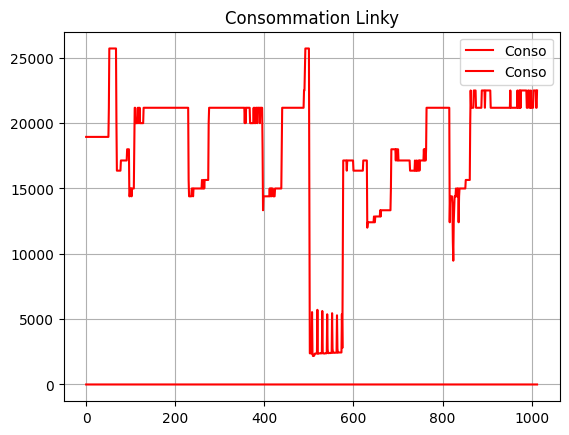

In [167]:

plt.title('Consommation Linky')
plt.plot(data, color='red',label='Conso')

plt.grid()
plt.legend()

### conso.csv sur WD6TB mis à jour avec PI4

In [168]:
def get_data2(filename):    
    data = pd.read_csv(filename, names=["Interval","kWh"])
    return data

In [169]:
old = False

if old:
    #conso_file = r"C:\Users\jean\Documents\conso.csv"
    conso_file = r"Y:\Documents\conso_old.csv"
    conso_file = r"Y:\Documents\conso - Copy (2).csv"
else:
    conso_file = r"Y:\Documents\conso.csv"
#old = False
conso_data = get_data2(conso_file)
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Interval  13119 non-null  int64  
 1   kWh       13119 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 205.1 KB


In [170]:
conso_data = conso_data.dropna()
conso_data

,Interval,kWh
0,26289,0.14
1,26243,0.14
2,25885,0.14
3,25754,0.14
4,25774,0.14
...,...,...
13114,24502,0.15
13115,21535,0.17
13116,2533,1.42
13117,2448,1.47


In [171]:
conso_data['sec']=conso_data['Interval']/1000
conso_data['Wh']=3600000/conso_data['Interval']
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

conso_data

,Interval,kWh,sec,Wh,cumul(ms)
0,26289,0.14,26.289,136.939404,26289
1,26243,0.14,26.243,137.179438,52532
2,25885,0.14,25.885,139.076685,78417
3,25754,0.14,25.754,139.784111,104171
4,25774,0.14,25.774,139.675642,129945
...,...,...,...,...,...
13114,24502,0.15,24.502,146.926781,331392523
13115,21535,0.17,21.535,167.169724,331414058
13116,2533,1.42,2.533,1421.239637,331416591
13117,2448,1.47,2.448,1470.588235,331419039


In [172]:
# index dernier echantillon
l=len(conso_data)-1
l

13118

In [173]:
# cumtime = int(conso_data['cumul(ms)'].tail(1).values[0]*1000)
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

331421526000

In [174]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)

if old:
    base = dt.datetime(2023, 8, 1, 10, 45, 0) - timedelta(microseconds=cumtime)


conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data#.info()


,Interval,kWh,sec,Wh,cumul(ms),dates
0,26289,0.14,26.289,136.939404,26289,2024-03-07 00:21:32.028747
1,26243,0.14,26.243,137.179438,52532,2024-03-07 00:21:58.271747
2,25885,0.14,25.885,139.076685,78417,2024-03-07 00:22:24.156747
3,25754,0.14,25.754,139.784111,104171,2024-03-07 00:22:49.910747
4,25774,0.14,25.774,139.675642,129945,2024-03-07 00:23:15.684747
...,...,...,...,...,...,...
13114,24502,0.15,24.502,146.926781,331392523,2024-03-10 20:24:18.262747
13115,21535,0.17,21.535,167.169724,331414058,2024-03-10 20:24:39.797747
13116,2533,1.42,2.533,1421.239637,331416591,2024-03-10 20:24:42.330747
13117,2448,1.47,2.448,1470.588235,331419039,2024-03-10 20:24:44.778747


In [175]:
#conso_data
conso_data.head(1),conso_data.tail(1)

(   Interval   kWh     sec          Wh  cumul(ms)                      dates
 0     26289  0.14  26.289  136.939404      26289 2024-03-07 00:21:32.028747,
        Interval   kWh    sec           Wh  cumul(ms)  \
 13118      2487  1.45  2.487  1447.527141  331421526   
 
                            dates  
 13118 2024-03-10 20:24:47.265747  )

In [176]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

time = conso_data['dates']
time


0       2024-03-07 00:21:32.028747
1       2024-03-07 00:21:58.271747
2       2024-03-07 00:22:24.156747
3       2024-03-07 00:22:49.910747
4       2024-03-07 00:23:15.684747
                   ...            
13114   2024-03-10 20:24:18.262747
13115   2024-03-10 20:24:39.797747
13116   2024-03-10 20:24:42.330747
13117   2024-03-10 20:24:44.778747
13118   2024-03-10 20:24:47.265747
Name: dates, Length: 13119, dtype: datetime64[ns]

In [177]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [178]:
if not old:
    major_ticks=1/60;minor_ticks=1/240  # plus de ticks, 4 fois plus de minor
    major_ticks=1/30;minor_ticks=1/120   # moins de ticks
    major_ticks=1/15;minor_ticks=1/60
    major_ticks=1/2;minor_ticks=1/8
else:
    major_ticks=4;minor_ticks=1   # encore moins si int


In [179]:
major_ticks=4;minor_ticks=1
major_ticks,minor_ticks

(4, 1)

## Main graph

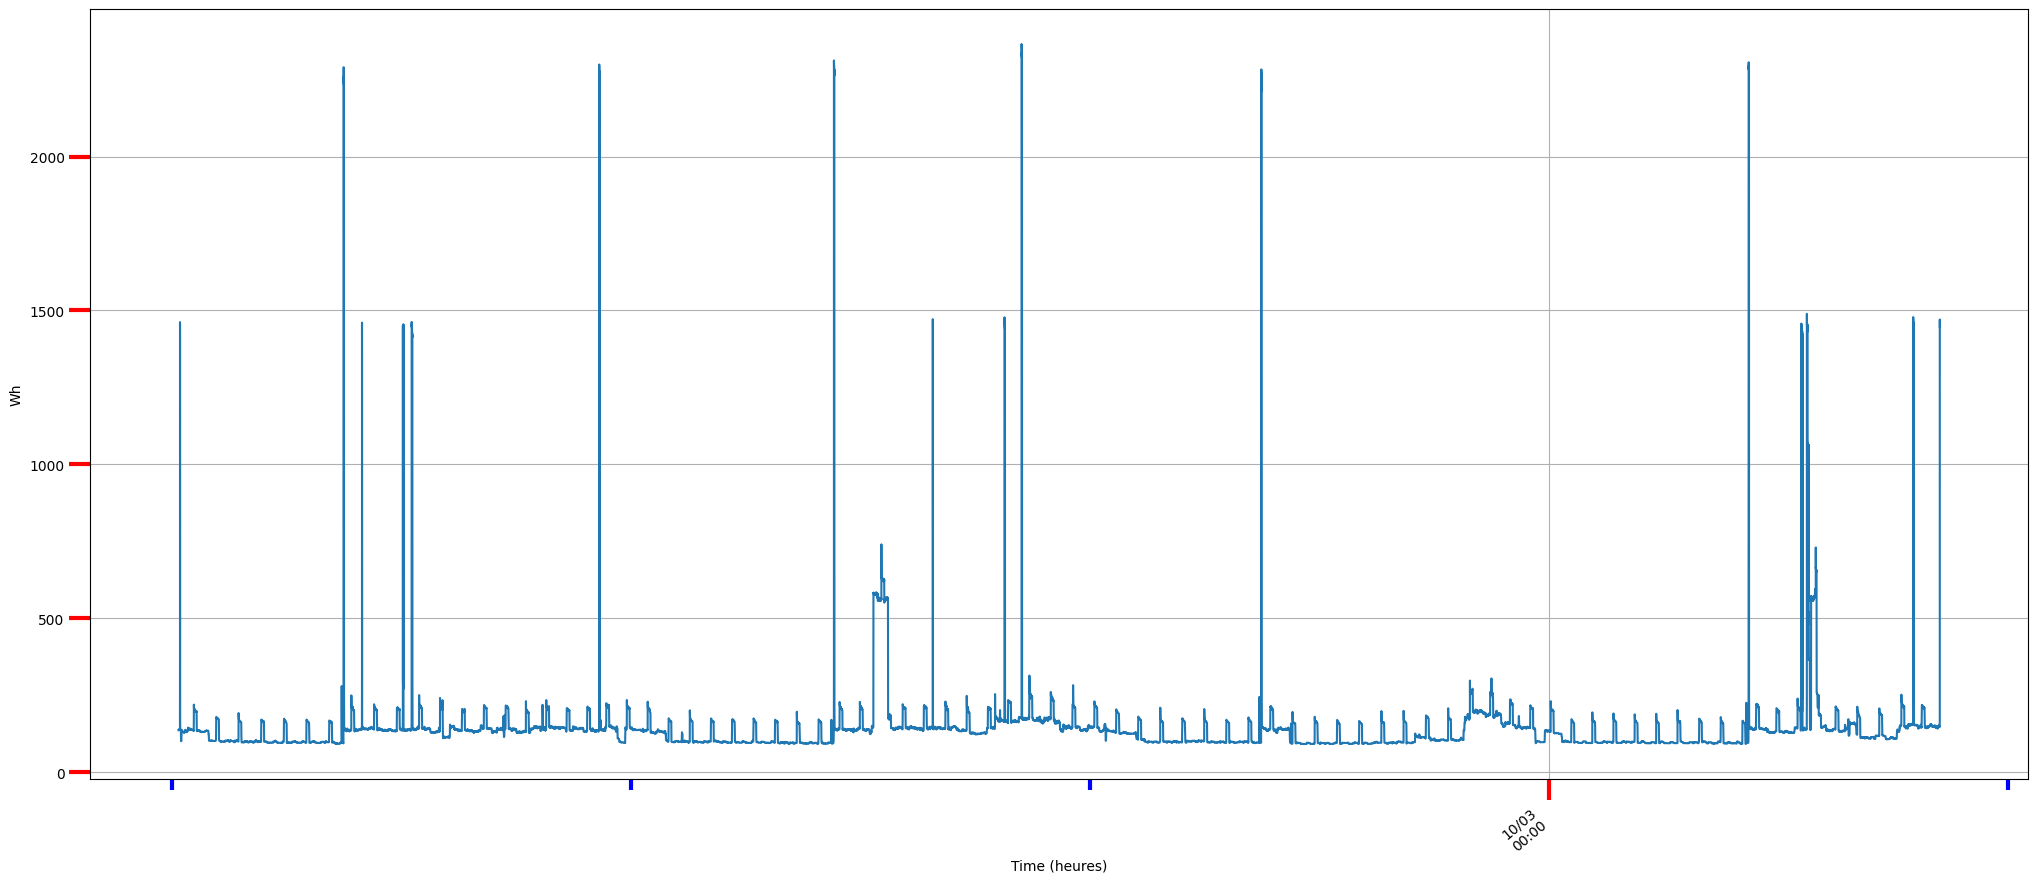

In [180]:

from matplotlib.dates import (YEARLY, DateFormatter,rrulewrapper, RRuleLocator, drange)

def show_graph():
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(25, 10)

    #plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
    
    #formatter = DateFormatter('%d/%m\n%H:%M:%S')
    formatter = DateFormatter('%d/%m\n%H:%M')
    ax.xaxis.set_major_formatter(formatter)

    # ticks sur axe des x
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # minor ticks tous les 5 min
    ax.tick_params(which='both', width=3)
    ax.tick_params(which='major', length=15, color='r')
    ax.tick_params(which='minor', length=8, color='b')

    #plt.plot(conso_data['cumul(ms)']/3600000,conso_data['Wh'])
    plt.plot(time,conso_data['Wh'])
    plt.ylabel('Wh')
    plt.xlabel('Time (heures)')
    #format_date(10)
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')

    #fig.autofmt_xdate()
    
    plt.grid()
    plt.show()
show_graph()

In [181]:
cumul_conso = len(conso_data)
conso_data.tail(1)

,Interval,kWh,sec,Wh,cumul(ms),dates
13118,2487,1.45,2.487,1447.527141,331421526,2024-03-10 20:24:47.265747


In [182]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

331421526000

# Slice of last 1 kWh

In [183]:
l = len(conso_data)  # total watt consommés
l

13119

In [184]:
k = 1
taille = k*1000  # fenetre k*1000 watt consommés
l,taille

(13119, 1000)

In [185]:
if l<1000:
    part = 1
else: part = 1/2
#taille = int(part*l)
taille

1000

In [186]:
data = conso_data.tail(taille)
len(data),data

(1000,
        Interval   kWh     sec           Wh  cumul(ms)  \
 12119      5480  0.66   5.480   656.934307  308149713   
 12120      5495  0.65   5.495   655.141037  308155208   
 12121      5488  0.65   5.488   655.976676  308160696   
 12122      5475  0.66   5.475   657.534247  308166171   
 12123      5461  0.66   5.461   659.219923  308171632   
 ...         ...   ...     ...          ...        ...   
 13114     24502  0.15  24.502   146.926781  331392523   
 13115     21535  0.17  21.535   167.169724  331414058   
 13116      2533  1.42   2.533  1421.239637  331416591   
 13117      2448  1.47   2.448  1470.588235  331419039   
 13118      2487  1.45   2.487  1447.527141  331421526   
 
                            dates  
 12119 2024-03-10 13:56:55.452747  
 12120 2024-03-10 13:57:00.947747  
 12121 2024-03-10 13:57:06.435747  
 12122 2024-03-10 13:57:11.910747  
 12123 2024-03-10 13:57:17.371747  
 ...                          ...  
 13114 2024-03-10 20:24:18.262747  
 13115 

In [187]:
now = datetime.now()
# conso.csv dynamique
cumtime_start= int(conso_data._get_value(l-taille+1,'cumul(ms)')*1000) # conversion microseconds


In [188]:
cumtime_end= int(data._get_value(l-1,'cumul(ms)')*1000) # conversion microseconds


In [189]:
cumtime_end,cumtime_start

(331421526000, 308155208000)

In [190]:
#last_interval = int(data._get_value(l,'Interval')*1000) # conversion microseconds
delta_cumtime = cumtime_end - cumtime_start #+ last_interval
delta_cumtime

23266318000

In [191]:

base = now - timedelta(microseconds=delta_cumtime)
now,base, data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')


(datetime.datetime(2024, 3, 10, 20, 24, 52, 567324),
 datetime.datetime(2024, 3, 10, 13, 57, 6, 249324),
 '10/03/2024 20:24:47')

In [192]:
end = conso_data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')
start = conso_data['dates'][l-taille+1].strftime('%d/%m/%Y %H:%M:%S')
start,end

('10/03/2024 13:57:00', '10/03/2024 20:24:47')

In [193]:
data.head(1)['dates'].to_string(index=False),data.tail(1)['dates'].to_string(index=False)

('2024-03-10 13:56:55.452747', '2024-03-10 20:24:47.265747')

In [194]:
k

1

In [195]:
data.Interval.tail(1000)

12119     5480
12120     5495
12121     5488
12122     5475
12123     5461
         ...  
13114    24502
13115    21535
13116     2533
13117     2448
13118     2487
Name: Interval, Length: 1000, dtype: int64

In [196]:
conversion_us_heure = 1/1000/60/60 
temps_1kWh = sum(data.Interval.tail(1000))*conversion_us_heure  #somme 1000 interval = temps conso 1 kWh
conso_jour = 24/temps_1kWh
heure = int(temps_1kWh)
mn = (temps_1kWh - heure)*60
sec = (mn - int(mn))*60
temps_1kWh, conso_jour,heure,int(mn),int(sec)

(6.465914722222223, 3.7117718112668854, 6, 27, 57)

In [197]:
data

,Interval,kWh,sec,Wh,cumul(ms),dates
12119,5480,0.66,5.480,656.934307,308149713,2024-03-10 13:56:55.452747
12120,5495,0.65,5.495,655.141037,308155208,2024-03-10 13:57:00.947747
12121,5488,0.65,5.488,655.976676,308160696,2024-03-10 13:57:06.435747
12122,5475,0.66,5.475,657.534247,308166171,2024-03-10 13:57:11.910747
12123,5461,0.66,5.461,659.219923,308171632,2024-03-10 13:57:17.371747
...,...,...,...,...,...,...
13114,24502,0.15,24.502,146.926781,331392523,2024-03-10 20:24:18.262747
13115,21535,0.17,21.535,167.169724,331414058,2024-03-10 20:24:39.797747
13116,2533,1.42,2.533,1421.239637,331416591,2024-03-10 20:24:42.330747
13117,2448,1.47,2.448,1470.588235,331419039,2024-03-10 20:24:44.778747


<Axes: >

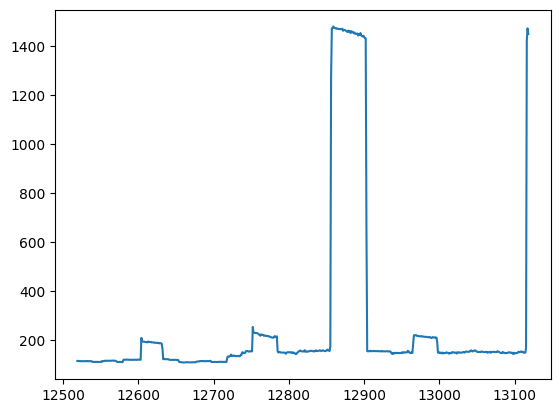

In [198]:
data.tail(600)['Wh'].plot()

In [199]:
data['Wh']

12119     656.934307
12120     655.141037
12121     655.976676
12122     657.534247
12123     659.219923
            ...     
13114     146.926781
13115     167.169724
13116    1421.239637
13117    1470.588235
13118    1447.527141
Name: Wh, Length: 1000, dtype: float64

# k kW window graph

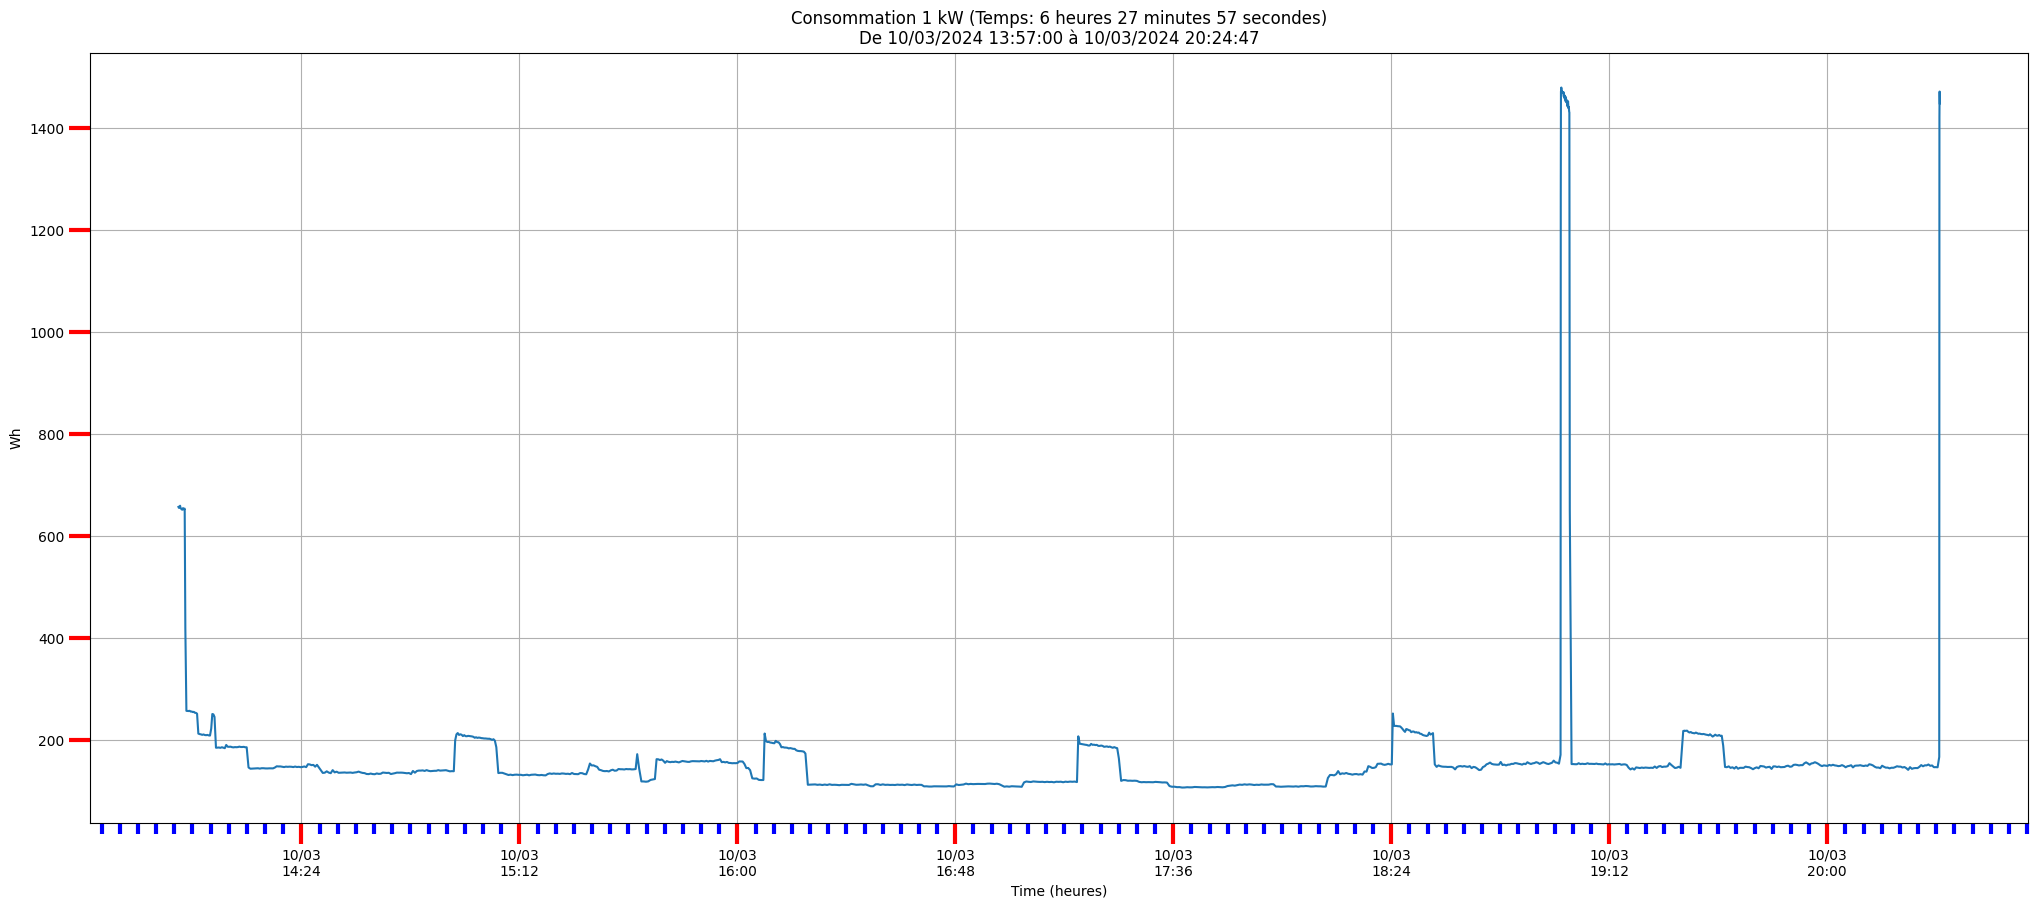

In [200]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)

formatter = DateFormatter('%d/%m\n%H:%M')
ax.xaxis.set_major_formatter(formatter)

# ticks sur axe des x
major_ticks=1/30;minor_ticks=1/360
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # 1 major tick tous les 48 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # 1 minor ticks tous les 4 min
ax.tick_params(which='both', width=3)
ax.tick_params(which='major', length=15, color='r')
ax.tick_params(which='minor', length=8, color='b')

plt.title(f'Consommation {k} kW (Temps: {heure} heures {int(mn)} minutes {int(sec)} secondes)\nDe {start} à {end}')
plt.plot(data['dates'],data['Wh'])
plt.ylabel('Wh')
plt.xlabel('Time (heures)')
plt.grid()


<Axes: ylabel='Frequency'>

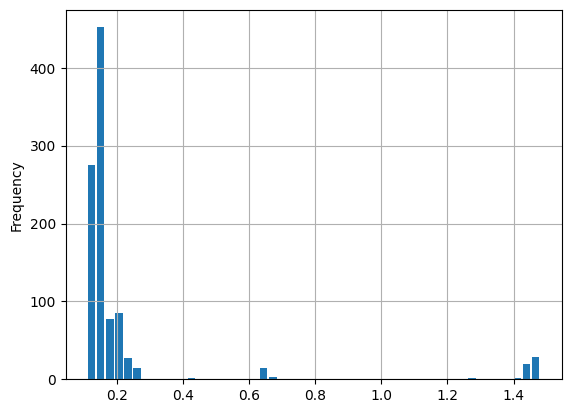

In [201]:
data.kWh.plot.hist(bins=50,rwidth=0.8,grid=True)


In [202]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms),dates
13114,24502,0.15,24.502,146.926781,331392523,2024-03-10 20:24:18.262747
13115,21535,0.17,21.535,167.169724,331414058,2024-03-10 20:24:39.797747
13116,2533,1.42,2.533,1421.239637,331416591,2024-03-10 20:24:42.330747
13117,2448,1.47,2.448,1470.588235,331419039,2024-03-10 20:24:44.778747
13118,2487,1.45,2.487,1447.527141,331421526,2024-03-10 20:24:47.265747


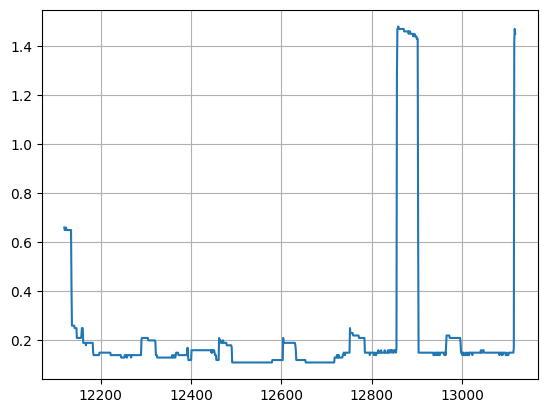

In [203]:
conso_data.tail(1000)['kWh'].plot()
plt.grid()

In [204]:
#plt.plot(conso_data['sec'])
now = dt.datetime.now()
last_cumul = np.array(conso_data['cumul(ms)'].tail(1))[0]*1000.0  # us
last_cumul, last_cumul/60e6  # min

(331421526000.0, 5523.6921)

In [205]:
begin = now - dt.timedelta(microseconds=last_cumul)  #2023, 6, 24, 9, 14, (39, 942895) approximatif
now, begin

(datetime.datetime(2024, 3, 10, 20, 25, 7, 257565),
 datetime.datetime(2024, 3, 7, 0, 21, 25, 731565))

In [206]:
x = mdates.drange(begin,now,dt.timedelta(microseconds=1000000))  # seconds
len(conso_data),len(x),len(x)/3600

(13119, 331422, 92.06166666666667)

In [207]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [208]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
base = dt.datetime(2005, 2, 1)
dates = [base + dt.timedelta(hours=(2 * i)) for i in range(732)]
N = len(dates)
N


732

In [209]:
732/12 # 60 jours

61.0

In [210]:
dates[0],dates[-1]

(datetime.datetime(2005, 2, 1, 0, 0), datetime.datetime(2005, 4, 2, 22, 0))

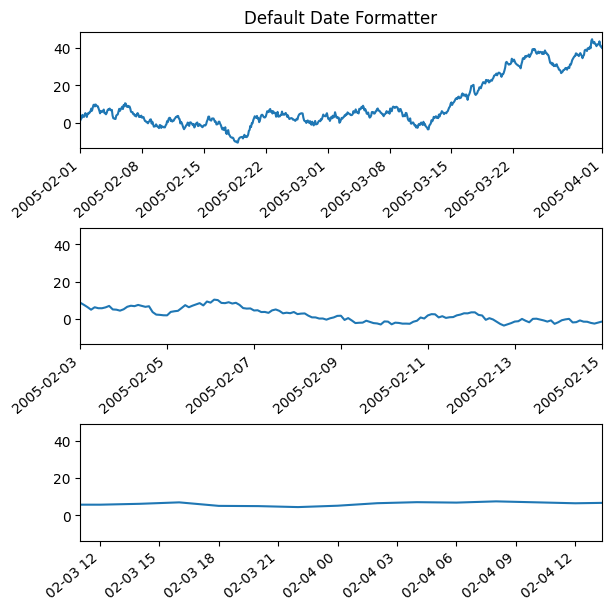

In [211]:
np.random.seed(19680801)
y = np.cumsum(np.random.randn(N))

fig, axs = plt.subplots(3, 1, layout='constrained', figsize=(6, 6))
lims = [(np.datetime64('2005-02'), np.datetime64('2005-04')),
        (np.datetime64('2005-02-03'), np.datetime64('2005-02-15')),
        (np.datetime64('2005-02-03 11:00'), np.datetime64('2005-02-04 13:20'))]
for nn, ax in enumerate(axs):
    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
    # rotate_labels...
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')
axs[0].set_title('Default Date Formatter')
plt.show()

In [212]:
t = dt.datetime(2005, 4, 2, 22, 0)
t

datetime.datetime(2005, 4, 2, 22, 0)